# Домашнее задание

## Pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Датасет содержит в себе данные работников, сколько им лет, департамент, образование и т.д.

**Расшифровка по значениям:**
- Education - Образование (1='Below College', 2='College', 3='Bachelor', 4='Master', 5='Doctor')

- EnvironmentSatisfaction - Удовлетворенность окружающей средой (1='Low', 2='Medium', 3='High', 4='Very High')

- JobInvolvement - Вовлеченность в работу (1='Low', 2='Medium', 3='High', 4='Very High')

- JobSatisfaction - Удовлетворенность работой (1='Low', 2='Medium', 3='High', 4='Very High')

- PerformanceRating - Рейтинг производительности (1='Low', 2='Good', 3='Excellent', 4='Outstanding')

- RelationshipSatisfaction - Удовлетворенность отношениями (1='Low', 2='Medium', 3='High', 4='Very High')

- WorkLifeBalance - Баланс между работой и личной жизнью (1='Bad', 2='Good', 3='Better', 4='Best')

1) Прочитать датасет hr-analysis-prediction.csv и записать его в DataFrame

In [2]:
df = pd.read_csv('hr-analysis-prediction.csv')

2) Вывести Типы данных по каждому столбцу, а также пропуски при помощи ОДНОГО метода

In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1464 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1328 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
df[:10]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2.0,Life Sciences,1,1,...,1,80,0,8.0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1.0,Life Sciences,1,2,...,4,80,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,NaN,Other,1,4,...,2,80,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4.0,Life Sciences,1,5,...,3,80,0,8.0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1.0,Medical,1,7,...,4,80,1,6.0,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2.0,Life Sciences,1,8,...,3,80,0,8.0,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3.0,Medical,1,10,...,1,80,3,12.0,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1.0,Life Sciences,1,11,...,2,80,1,1.0,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3.0,Life Sciences,1,12,...,2,80,0,10.0,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3.0,Medical,1,13,...,2,80,2,17.0,3,2,7,7,7,7


3) Вывести размер датасета

In [5]:
df.shape

(1470, 35)

4) Найти медианное значение признаков:
    
- DailyRate
- DistanceFromHome
- MonthlyIncome

In [6]:
"""
лучше после колонок писать median()
иначе он начинает ругаться, что не все колонки числовые
"""
df[['DailyRate','DistanceFromHome', 'MonthlyIncome']].median()

DailyRate            802.0
DistanceFromHome       7.0
MonthlyIncome       4919.0
dtype: float64

5) Найти средний размер зарплаты (MonthlyIncome) для работников из департамента **'Human Resources'**. Департамент - колонка Department

In [8]:
"""
лучше после колонок писать mean()
иначе он начинает ругаться, что не все колонки числовые
"""
df[df['Department'] == 'Human Resources']['MonthlyIncome'].mean()

6654.507936507936

6) Сгруппируйте датасет df по **полям Department и EducationField** и найдите медианное значение по полям **Age и DistanceFromHome**

In [8]:
df.groupby(['Department', 'EducationField'])['Age', 'DistanceFromHome'].median()

/tmp/ipykernel_8657/2656513311.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Department', 'EducationField'])['Age', 'DistanceFromHome'].median()


Age  DistanceFromHome
Department             EducationField                          
Human Resources        Human Resources   36.0               6.0
                       Life Sciences     41.0               4.5
                       Medical           42.0               6.0
                       Other             37.0               8.0
                       Technical Degree  34.5               5.0
Research & Development Life Sciences     36.0               7.0
                       Medical           36.0               7.0
                       Other             35.5               7.5
                       Technical Degree  35.5               5.0
Sales                  Life Sciences     36.0               7.0
                       Marketing         36.0               8.0
                       Medical           34.0               6.0
                       Other             31.0               5.0
                       Technical Degree  33.0               8.0

7) Сгруппируйте датасет df по полям **Department, EducationField и Attrition** (вместе), найдите медианное значение по полю **MonthlyIncome**

In [9]:
df.groupby(['Department', 'EducationField', 'Attrition'])['MonthlyIncome'].median()

Department              EducationField    Attrition
Human Resources         Human Resources   No           6212.0
                                          Yes          2335.0
                        Life Sciences     No           4490.0
                                          Yes          2741.0
                        Medical           No           4936.0
                                          Yes          6315.0
                        Other             No           4071.0
                        Technical Degree  No           3509.5
                                          Yes          2653.0
Research & Development  Life Sciences     No           4768.5
                                          Yes          2725.0
                        Medical           No           4722.0
                                          Yes          3388.0
                        Other             No           4107.0
                                          Yes          2693.0
                  

8) Заполнить пропуски **модой** (для каждого признака должно быть свое значение моды). Решается при помощи одной строки кода

In [10]:
df.fillna(df.mode().iloc[0], inplace=True)

9) Замените данные в столбце **Education** на значения из описания. Проверьте, что замена произошла

Например:
- 1 соответсвует 'Below College'
- 2 соответсвует 'College'

In [11]:
df = df.replace({
    'Education': {
        1.0: 'Below College',
        2.0: 'College',
        3.0: 'Bachelor',
        4.0: 'Master',
        5.0: 'Doctor'
    }
})
df[:10]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,1,80,0,8.0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,4,80,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Bachelor,Other,1,4,...,2,80,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,3,80,0,8.0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,4,80,1,6.0,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,1,8,...,3,80,0,8.0,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,...,1,80,3,12.0,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,1,11,...,2,80,1,1.0,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,Bachelor,Life Sciences,1,12,...,2,80,0,10.0,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,1,13,...,2,80,2,17.0,3,2,7,7,7,7


10) Сохраните данные в виде DataFrame в две переменные из датасета: 
- 1 - с полями Age, Department, EducationField, DailyRate
- 2 - с полями Department, EducationField, также во втором датасете **необходимо УДАЛИТЬ дубли.** 

После создания двух DataFrame соедините их по **полям Department и EducationField** при помощи pandas.merge() (how='inner', его не обязательно использовать, так как идет по умолчанию)

Удаление дублей
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [36]:
part1_df = df[['Age', 'Department', 'EducationField', 'DailyRate']]
part2_df = df[['Department', 'EducationField']].drop_duplicates()

In [37]:
pd.merge(part1_df, part2_df, how='inner')

,Age,Department,EducationField,DailyRate
0,41,Sales,Life Sciences,1102
1,53,Sales,Life Sciences,1219
2,36,Sales,Life Sciences,1218
3,33,Sales,Life Sciences,1141
4,27,Sales,Life Sciences,994
...,...,...,...,...
1465,35,Human Resources,Technical Degree,528
1466,34,Human Resources,Technical Degree,1107
1467,29,Human Resources,Other,332
1468,37,Human Resources,Other,1239


11) Сделайте конкатинацию pandas.concat() полученных датасетов в 10 задании по столбцам (axis=1). Присваивать ничего не нужно

In [14]:
pd.concat([part1_df, part2_df], axis=1)

,Age,Department,EducationField,DailyRate,Department,EducationField
0,41,Sales,Life Sciences,1102,Sales,Life Sciences
1,49,Research & Development,Life Sciences,279,Research & Development,Life Sciences
2,37,Research & Development,Other,1373,Research & Development,Other
3,33,Research & Development,Life Sciences,1392,Research & Development,Life Sciences
4,27,Research & Development,Medical,591,Research & Development,Medical
...,...,...,...,...,...,...
1465,36,Research & Development,Medical,884,Research & Development,Medical
1466,39,Research & Development,Medical,613,Research & Development,Medical
1467,27,Research & Development,Life Sciences,155,Research & Development,Life Sciences
1468,49,Sales,Medical,1023,Sales,Medical


12) Замените значение "Yes" на 1, а "No" на 0 при помощи map в **столбце Attrition**. Проверьте, что в датасете произошли изменения

In [15]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df[:10]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,1,80,0,8.0,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,4,80,1,10.0,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Bachelor,Other,1,4,...,2,80,0,7.0,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,3,80,0,8.0,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,4,80,1,6.0,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,1,8,...,3,80,0,8.0,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,...,1,80,3,12.0,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,1,11,...,2,80,1,1.0,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,Bachelor,Life Sciences,1,12,...,2,80,0,10.0,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,1,13,...,2,80,2,17.0,3,2,7,7,7,7


13) Подсчитать количество сотрудников **в каждом** из Департаментов (столбец **Department**), которые имеют образование (столбец **Education**): 'Bachelor' **или** 'Master', а также **ОТНОРМИРОВАТЬ** на общее количество людей, имеющих перечисленные образования (если в каком то департаменте сотрудников с таким образованием нет, то его включать не нужно).

Подсказка:

Задача решается в одну строку. В лекции рассматривали метод, который имеет параметр для нормализации

In [9]:
"""
Длина строки кода
"""
df[(df['Education'] == 'Bachelor') | 
   (df['Education'] == 'Master')]['Department'].value_counts(normalize=True)

Series([], Name: Department, dtype: float64)

14) Построить два отдельных графика, которые отражают интерквартильный размах, а также медиану с помощью библиотеки seaborn для MonthlyIncome и DailyRate (столбцов из датасета).

**Отобразить ДВА графика в ОДНОЙ СТРОКЕ с разными цветами**

<AxesSubplot: >

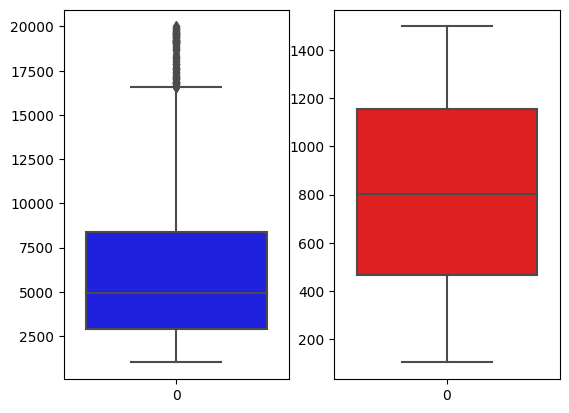

In [48]:
fig, axes = plt.subplots(ncols=2, nrows=1)
sns.boxplot(df['MonthlyIncome'], color='blue', ax=axes[0])
sns.boxplot(df['DailyRate'], color='red', ax=axes[1])

15) Построить график boxplot, где исследуете медиану, IQR такого параметра как **MonthlyIncome (по OY)** в разрезе **EducationField (по OX)**, сравнив все эти показатели **ОТНОСИТЕЛЬНО Attrition** (параметр hue в seaborn.boxplot)

<AxesSubplot: xlabel='EducationField', ylabel='MonthlyIncome'>

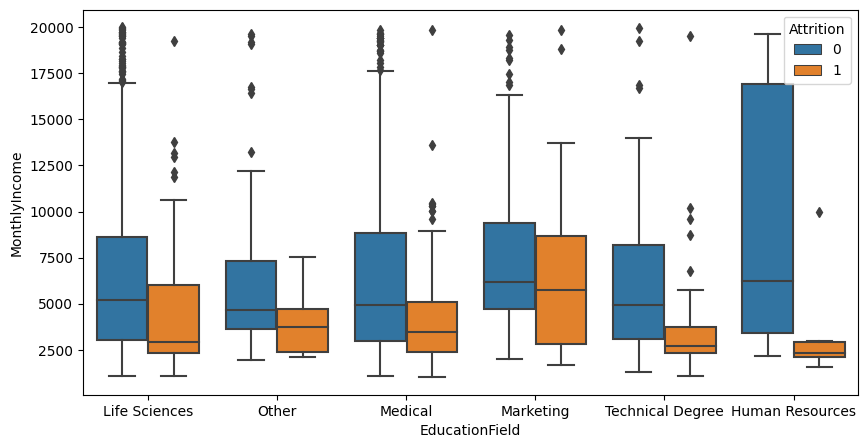

In [49]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x=df['EducationField'], y=df['MonthlyIncome'], hue=df['Attrition'])

16) Найти параметры характеризующие разброс для **TotalWorkingYears**:
    
 - Дисперисию (для генеральной совокупности и для выборки отдельно). За выборку возьмите тот же датафрейм, что и для генеральной совокупности, но другой ddof
 - Среднеквадратическое отклонение
 - Стандартное отклонение
 - IQR

In [18]:
var_g = np.var(df['TotalWorkingYears'])
var_e = np.var(df['TotalWorkingYears'], ddof=1)
q = np.sqrt(var_g)
sd = np.sqrt(var_e)

perc_75 = np.percentile(df['TotalWorkingYears'], 75)
perc_25 = np.percentile(df['TotalWorkingYears'], 25)
IQR = perc_75 - perc_25

In [19]:
print(var_g, var_e, q, sd, perc_75, perc_25)

61.054035643750545 61.09679057067194 7.813708187778102 7.816443601195619 nan nan
